<a href="https://colab.research.google.com/github/AliConda/AliConda/blob/main/Article_Integral_IZO_ANN_peak_area_ratio_fraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#df=pd.read_excel('Integral_of_peaks_comparison_IZO_only.xlsx')  the 3mbar with its 21 ohm sq was worng so now removed
df=pd.read_excel('Integral_of_peaks_comparison_IZO_only_3mbarcutout.xlsx')

In [ ]:
df.head(2)

,A,B,C,D,E,F,G,H,I,J,K,L,Pres,Sheet,Sample,ID,Unnamed: 16,sum,Unnamed: 18,A.1,B.1,C.1,D.1,E.1,F.1,G.1,H.1,I.1,J.1,K.1,L.1,Sheet.1
0,743.8543,340.2103,2926.237,1384.301,768.4669,1008.149,861.4096,1002.9320,1570.475,2182.261,3235.216,115.4485,1.0,13.5,IZO,1,NaN,16138.9606,NaN,0.046091,0.021080,0.181315,0.085774,0.047616,0.062467,0.053375,0.062144,0.097310,0.135217,0.200460,0.007153,13.5
1,741.7682,335.8525,2929.873,1375.218,768.2396,1002.382,860.3216,990.2999,1558.786,2181.261,3227.857,113.7976,1.0,13.5,IZO,1,NaN,16085.6564,NaN,0.046114,0.020879,0.182142,0.085493,0.047759,0.062315,0.053484,0.061564,0.096905,0.135603,0.200667,0.007074,13.5


In [ ]:
df.shape

(517, 32)

In [ ]:
X=df.iloc[:,19:31].values
y=df.iloc[:,31].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

##ANN Buildup

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(units=30,activation='relu'))
#model.add(Dense(units=100,activation='relu'))
#model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.Huber(),
              metrics=['mae'])

#mae  >> great for any regressions problem
#mase >> when large errors are more significant than smaller errors
#huber >> combination of both and less sensitive to outliners  tf.keras.losses.Huber()  we got the best results with this

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 2ms/step - loss: 9.3557 - mae: 9.8557
Epoch 2/150
13/13 [==============================] - 0s 2ms/step - loss: 6.7464 - mae: 7.2464
Epoch 3/150
13/13 [==============================] - 0s 2ms/step - loss: 1.6375 - mae: 2.0994
Epoch 4/150
13/13 [==============================] - 0s 2ms/step - loss: 1.0252 - mae: 1.4485
Epoch 5/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8551 - mae: 1.2382
Epoch 6/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8076 - mae: 1.2095
Epoch 7/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8277 - mae: 1.2324
Epoch 8/150
13/13 [==============================] - 0s 3ms/step - loss: 0.8041 - mae: 1.2171
Epoch 9/150
13/13 [==============================] - 0s 3ms/step - loss: 0.8024 - mae: 1.2150
Epoch 10/150
13/13 [==============================] - 0s 2ms/step - loss: 0.8250 - mae: 1.2265
Epoch 11/150
13/13 [==============================] - 0s 2m

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

(104, 1)

In [ ]:
y_test=y_test.reshape(104,1)

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred,y_test)



0.6767856909678535

In [ ]:
np.set_printoptions(precision=2)
results=np.concatenate((y_pred,y_test),1)

In [ ]:
#model.save('ANN_model_for_IZO_peak_ratio.h5')

In [ ]:
#model.save_weights('IZO_peak_ratio.h5')

In [ ]:
#/content/ANN_model_for_IZO_peak_ratio

In [ ]:
results_ann_peak_ratio=pd.DataFrame(results,columns=['y_pred','y_test'])

In [ ]:
results_ann_peak_ratio.head(50)

,y_pred,y_test
0,9.981297,9.8
1,10.688016,10.7
2,9.630534,9.6
3,8.931956,10.0
4,9.623703,9.8
5,11.188565,11.0
6,9.608744,9.8
7,9.941178,9.6
8,7.890296,7.5
9,10.936285,11.0


In [ ]:
Writer=pd.ExcelWriter('outpu.xlsx')

results_ann_peak_ratio.to_excel(Writer)

In [ ]:
Writer.save()

In [ ]:
from sklearn import metrics

In [ ]:
metrics.explained_variance_score(y_test,y_pred)

0.795532650012956

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.7094074995577222

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 1,219
Trainable params: 1,219
Non-trainable params: 0
_________________________________________________________________


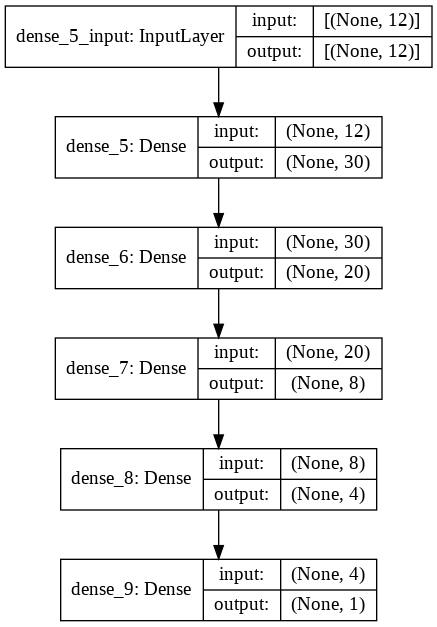

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

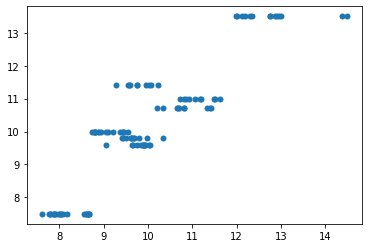

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test,marker='o',linewidths=0.0002)

In [ ]:
tf.keras.metrics.mae(y_test,y_pred)

<tf.Tensor: shape=(104,), dtype=float32, numpy=
array([0.18, 0.01, 0.03, 1.07, 0.18, 0.19, 0.19, 0.34, 0.39, 0.06, 0.71,
       0.42, 1.21, 0.5 , 1.16, 0.05, 0.51, 1.12, 0.95, 0.19, 0.27, 0.64,
       0.18, 1.17, 0.15, 1.21, 1.17, 0.54, 0.06, 0.29, 0.3 , 1.85, 0.5 ,
       0.62, 0.98, 1.37, 0.38, 0.12, 0.3 , 1.16, 1.66, 1.2 , 0.11, 0.  ,
       1.19, 0.26, 0.56, 1.18, 0.38, 1.14, 2.13, 0.89, 0.53, 0.37, 0.39,
       0.49, 0.59, 1.11, 1.83, 0.32, 0.79, 0.14, 0.49, 0.54, 1.51, 0.76,
       0.12, 0.75, 1.5 , 0.05, 1.31, 0.58, 1.45, 0.55, 1.65, 0.68, 0.29,
       1.32, 1.11, 1.27, 0.44, 1.06, 0.11, 0.3 , 0.35, 0.46, 0.59, 0.87,
       0.73, 0.12, 1.37, 0.64, 1.8 , 0.63, 1.19, 0.33, 0.14, 0.54, 0.24,
       0.49, 0.54, 0.01, 1.12, 0.43], dtype=float32)>

In [ ]:
tf.keras.metrics.mse(y_test,y_pred)

<tf.Tensor: shape=(104,), dtype=float32, numpy=
array([3.29e-02, 1.44e-04, 9.32e-04, 1.14e+00, 3.11e-02, 3.56e-02,
       3.66e-02, 1.16e-01, 1.52e-01, 4.06e-03, 5.03e-01, 1.73e-01,
       1.46e+00, 2.48e-01, 1.35e+00, 2.77e-03, 2.56e-01, 1.24e+00,
       9.00e-01, 3.60e-02, 7.37e-02, 4.11e-01, 3.09e-02, 1.37e+00,
       2.30e-02, 1.47e+00, 1.38e+00, 2.90e-01, 3.22e-03, 8.23e-02,
       8.96e-02, 3.41e+00, 2.48e-01, 3.88e-01, 9.59e-01, 1.87e+00,
       1.46e-01, 1.48e-02, 8.98e-02, 1.34e+00, 2.74e+00, 1.44e+00,
       1.29e-02, 1.09e-05, 1.42e+00, 6.93e-02, 3.18e-01, 1.38e+00,
       1.47e-01, 1.29e+00, 4.54e+00, 7.97e-01, 2.79e-01, 1.37e-01,
       1.51e-01, 2.39e-01, 3.48e-01, 1.23e+00, 3.34e+00, 1.02e-01,
       6.31e-01, 2.04e-02, 2.35e-01, 2.95e-01, 2.28e+00, 5.72e-01,
       1.39e-02, 5.61e-01, 2.24e+00, 2.05e-03, 1.71e+00, 3.32e-01,
       2.12e+00, 3.04e-01, 2.73e+00, 4.59e-01, 8.59e-02, 1.75e+00,
       1.22e+00, 1.61e+00, 1.96e-01, 1.13e+00, 1.29e-02, 8.81e-02,
       1.25e-0

In [ ]:
y_test.shape  # If we want a single value MAE or MSE,  squeex the dimentions

(104, 1)

In [ ]:
tf.keras.metrics.mae(tf.squeeze(y_pred),tf.squeeze(y_test))

<tf.Tensor: shape=(), dtype=float64, numpy=0.6767856909678535>